In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import time
import json
import requests
from pandas.io.json import json_normalize
import csv

In [4]:
# open wikidata_ticker_symbol_data.csv
# read the csv file into a dataframe

symbol_df = pd.read_csv('./data/companies/wikidata_ticker_symbol_data.csv')
list_df_1 = pd.read_csv('./data/companies/wikilist_1.csv', encoding='latin-1')
list_df_2 = pd.read_csv('./data/companies/wikilist_2.csv', encoding='latin-1')

In [4]:
list_df_2

,Date,Added,Added.1,Removed,Removed.1,Reason
0,Date,Ticker,Security,Ticker,Security,Reason
1,"October 3, 2023",NaN,NaN,DXC,DXC Technology,Market capitalization change.
2,"October 2, 2023",VLTO,Veralto,NaN,NaN,S&P 500 and S&P 100 constituent Danaher Corpor...
3,"September 18, 2023",BX,Blackstone,LNC,Lincoln National Corp,Market capitalization change.
4,"September 18, 2023",ABNB,Airbnb,NWL,Newell Brands Inc,Market capitalization change.
...,...,...,...,...,...,...
328,"June 9, 1999",WLP,Wellpoint,HPH,Harnischfeger Industries,Harnischfeger filed for bankruptcy.
329,"December 11, 1998",FSR,Firstar,LDW,Amoco,British Petroleum purchased Amoco.
330,"December 11, 1998",CCL,Carnival Corp.,GRN,General Re,Berkshire Hathaway purchased General Re.
331,"December 11, 1998",CPWR,Compuware,SUN,SunAmerica,AIG purchased SunAmerica.


In [15]:
len(symbol_df["tickerSymbol"].unique())
# check which companies are missing in the wikidata_ticker_symbol_data.csv 
result_list = []
result_list.extend(symbol_df["tickerSymbol"].to_list())

list_of_ticker_symbols_1 = list_df_1["Symbol"].unique()
missing_ticker_symbols = []
for symbol in list_of_ticker_symbols_1:
    if symbol not in symbol_df["tickerSymbol"].unique():
        missing_ticker_symbols.append({"symbol":symbol, "list":"first"})
        result_list.append(symbol)

list_of_ticker_symbols_2 = list_df_2["Removed"].unique()
for symbol in list_of_ticker_symbols_2:
    if symbol not in symbol_df["tickerSymbol"].unique():
        missing_ticker_symbols.append({"symbol":symbol, "list":"second"})
        result_list.append(symbol)


In [21]:
missing_ticker_symbols
len(set(result_list))

859

In [23]:
import requests

# get secret key from secret_file.json
secret_key = None
with open('secret_file.json') as f:
    secret_key = json.load(f)["secret_key"]



# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=IBM&apikey={secret_key}'
r = requests.get(url)
data = r.json()

print(data["Meta Data"])

{'1. Information': 'Monthly Adjusted Prices and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-10-13', '4. Time Zone': 'US/Eastern'}


In [10]:
# print(data.keys())
# print(data["Meta Data"])
print(data["Meta Data"]["2. Symbol"])
print(data["Monthly Adjusted Time Series"].keys())

IBM
dict_keys(['2023-10-03', '2023-09-29', '2023-08-31', '2023-07-31', '2023-06-30', '2023-05-31', '2023-04-28', '2023-03-31', '2023-02-28', '2023-01-31', '2022-12-30', '2022-11-30', '2022-10-31', '2022-09-30', '2022-08-31', '2022-07-29', '2022-06-30', '2022-05-31', '2022-04-29', '2022-03-31', '2022-02-28', '2022-01-31', '2021-12-31', '2021-11-30', '2021-10-29', '2021-09-30', '2021-08-31', '2021-07-30', '2021-06-30', '2021-05-28', '2021-04-30', '2021-03-31', '2021-02-26', '2021-01-29', '2020-12-31', '2020-11-30', '2020-10-30', '2020-09-30', '2020-08-31', '2020-07-31', '2020-06-30', '2020-05-29', '2020-04-30', '2020-03-31', '2020-02-28', '2020-01-31', '2019-12-31', '2019-11-29', '2019-10-31', '2019-09-30', '2019-08-30', '2019-07-31', '2019-06-28', '2019-05-31', '2019-04-30', '2019-03-29', '2019-02-28', '2019-01-31', '2018-12-31', '2018-11-30', '2018-10-31', '2018-09-28', '2018-08-31', '2018-07-31', '2018-06-29', '2018-05-31', '2018-04-30', '2018-03-29', '2018-02-28', '2018-01-31', '2017

In [25]:
raw_data = []
for index, x in enumerate(result_list):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={ x }&apikey={secret_key}'
    # !!!!!!carefull don't print url and commit!!!!!!!!
    if(index % 50 == 0):
        print(index)
    r = requests.get(url)
    data = r.json()
    raw_data.append(data)
    time.sleep(2.5)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [28]:
with open('./data/stock_infos/result.json', 'w') as fp:
    json.dump(raw_data, fp)

# start here if you dont want to download the data from strech


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import time
import json
import requests
from pandas.io.json import json_normalize
import csv

In [2]:
# start here if you dont want to download the data from strech

data = ""
with open('./data/stock_infos/result.json') as json_file:
    data = json_file.read()
data_as_json = json.loads(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
normalized_json_df = pd.json_normalize(data_as_json)
normalized_json_df = normalized_json_df.drop_duplicates("Meta Data.2. Symbol")
normalized_json_df = normalized_json_df.dropna(axis=0,subset=["Meta Data.2. Symbol"])
normalized_json_df = normalized_json_df.set_index("Meta Data.2. Symbol")

normalized_json_df

NameError: name 'data_as_json' is not defined

In [4]:
pd.Series(["545.7800"]).astype(float)

0    545.78
dtype: float64

In [ ]:
transposed_df =  normalized_json_df.transpose()
transposed_df = transposed_df.reset_index()

transposed_df["index_extracted"] = transposed_df["index"].replace({r".*(\d\d\d\d-\d\d-\d\d)(.*)": r"\1 \2"}, regex=True)
transposed_df[["date", "random_counter", "information"]] = transposed_df["index_extracted"].str.split(".", expand=True)
transposed_df["date"] = pd.to_datetime(transposed_df["date"], errors="coerce")
transposed_df.dropna(subset=['date'], inplace=True)

# set every column to numeric except date, random_counter and information and index_extracted
for x in transposed_df.columns:
    if(x != "date" and x != "random_counter" and x != "information" and x != "index_extracted" and x != "index"):
        transposed_df[x] = transposed_df[x].astype(float)

In [6]:
transposed_df[transposed_df["information"].str.strip() == "dividend amount"].max().reset_index()

,Meta Data.2. Symbol,0
0,index,Monthly Adjusted Time Series.2023-10-13.7. div...
1,ADBE,0.025
2,T,0.52
3,CSCO,0.39
4,GS,2.75
...,...,...
771,USL,0.0
772,index_extracted,2023-10-13 .7. dividend amount
773,date,2023-10-13 00:00:00
774,random_counter,7


In [7]:
show_max = transposed_df[transposed_df["information"].str.strip() == "dividend amount"].max().reset_index()
show_max["numeric"] = pd.to_numeric(transposed_df[transposed_df["information"].str.strip() == "dividend amount"].max().reset_index()[0], "coerce")
# show_max.dropna().sort_values("numeric").tail(60)

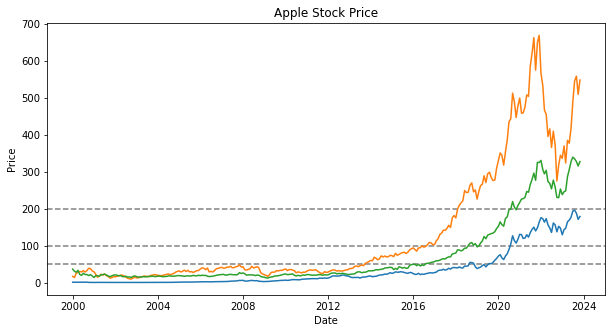

In [15]:

import matplotlib.pyplot as plt

# only take values where "closed" in column information stands
df_with_selected_information = transposed_df[transposed_df["information"].str.strip() == "adjusted close"]

# for x in df_with_selected_information.columns:
#     if(x != "date" and x != "random_counter" and x != "information" and x != "index_extracted" and x != "index"):
#        df_with_selected_information[x] = df_with_selected_information[df_with_selected_information[x] != 0][x]

# grouping the data by month so there is no varriance occuring when plotting more than one column 
# for example 
# 2020-01-01 | 2020-01-02 --|transferd to|--> 2020-01-01 | 2020-01-01
# ----------------------^-------------------------------------------^

df_with_selected_information = df_with_selected_information.groupby(pd.Grouper(freq='M', key="date")).first().reset_index()


df_to_plot = df_with_selected_information[["AAPL","ADBE", "MSFT", "date"]]
# df_to_plot = df_to_plot[df_to_plot["date"] > datetime.datetime.fromisoformat("2011-12-31T00:00:00")]
# df_to_plot = df_to_plot[df_to_plot["date"] < datetime.datetime.fromisoformat("2022-12-31T00:00:00")]
df_to_plot.dtypes

df_to_plot.set_index("date", inplace=True)
# make a line plot
# make the line plot wider
plt.figure(figsize=(10,5))
# title
plt.title("Apple Stock Price")
# ylabel
plt.ylabel("Price")
# xlabel
plt.xlabel("Date")
# reference line at 50 100 and 200
plt.axhline(50, color="gray", linestyle="--")
plt.axhline(100, color="gray", linestyle="--")
plt.axhline(200, color="gray", linestyle="--")

# add xticks every 2 years



# plot the data
plt.plot(df_to_plot)

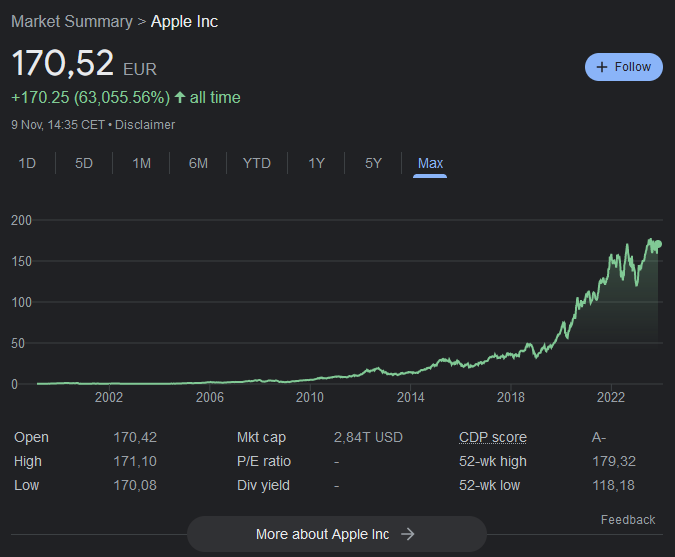 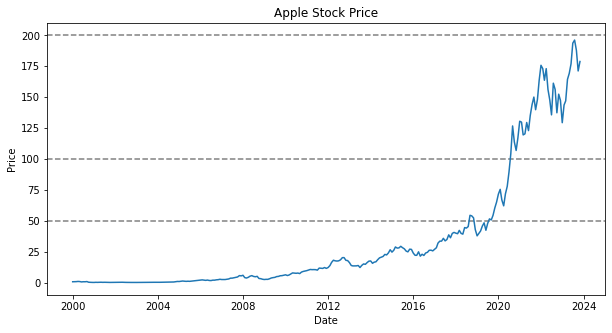

In [9]:
def show_row(x):
    # check if x is a pd.DataFrame
    if(not isinstance(x, pd.DataFrame)):
        return
    # add column together and divide by count of rows without 0
    for y in x.columns:
        # check if y is a numeric column
        if(not pd.api.types.is_numeric_dtype(x[y])):
            continue
        sum = x[y].sum()
        count = x[y].count()
        mean = sum / count
        print(y, sum, count, mean)
        input()
transposed_df[transposed_df["information"].str.strip() == "dividend amount"].groupby(pd.Grouper(freq='Y', key="date")).apply(lambda x: show_row(x))

ADBE 0.025 1 0.025


KeyboardInterrupt: Interrupted by user

In [68]:
# create an example series with data
s = pd.Series([1, 3, -5, 6, 8])
((s * 10).diff().dropna() > 0).all()
(s * 10)

0    10
1    30
2   -50
3    60
4    80
dtype: int64

In [75]:
def inside_function(x: pd.Series, col):
     print(x)
     if((x.diff().dropna() > 0).all()):
          # print(x.diff().dropna())
          print(col)
          print(x)
          # check consecutive values are increasing
     
     
     return x.all()


In [76]:
df_with_selected_information = transposed_df[transposed_df["information"].str.strip() == "dividend amount"]

df_with_selected_information = df_with_selected_information.groupby(pd.Grouper(freq='Y', key="date")).mean().reset_index()


# check if there is a column which has 10 consecutive not null and non-zero values
# set the number of consecutive not null values to check
n = 4

# get the columns of the dataframe
cols = df_with_selected_information.columns

result_columns = []
# loop through the columns
for col in cols:
    if(not pd.api.types.is_numeric_dtype(df_with_selected_information[col])):
        continue
    # check if the column has at least n not null and non-zero values
    if (df_with_selected_information[col] != 0).rolling(n).apply(lambda x: inside_function(x, col)).any():
        # use the rolling method to check for n consecutive not null and non-zero values
        # print(f"Column {col} has {n} consecutive not null and non-zero values.")
        # check if min value of the column is 5
        # print(df_with_selected_information[col].min())
        
        if(df_with_selected_information[col].min() <= 0.05):
            continue
        

        result_columns.append(col)

        



0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64
4    1.0
5    1.0
6    1.0
7    0.0
dtype: float64
5    1.0
6    1.0
7    0.0
8    0.0
dtype: float64
6    1.0
7    0.0
8    0.0
9    0.0
dtype: float64
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64
8     0.0
9     0.0
10    0.0
11    0.0
dtype: float64
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64
10    0.0
11    0.0
12    0.0
13    0.0
dtype: float64
11    0.0
12    0.0
13    0.0
14    0.0
dtype: float64
12    0.0
13    0.0
14    0.0
15    0.0
dtype: float64
13    0.0
14    0.0
15    0.0
16    0.0
dtype: float64
14    0.0
15    0.0
16    0.0
17    0.0
dtype: float64
15    0.0
16    0.0
17    0.0
18    0.0
dtype: float64
16    0.0
17    0.0
18    0.0
19    0.0
dtype: float64
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64
18    0.0
19    0.0
20    0.0
21    0.

KeyboardInterrupt: 

In [34]:
len(result_columns)

59

<AxesSubplot:xlabel='date'>

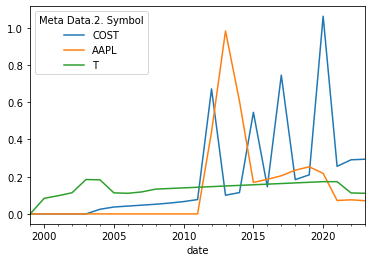

In [19]:
df_with_selected_information = transposed_df[transposed_df["information"].str.strip() == "dividend amount"]

df_with_selected_information = df_with_selected_information.groupby(pd.Grouper(freq='Y', key="date")).mean().reset_index()

df_to_plot = df_with_selected_information[["COST","AAPL", "T", "date"]]
# df_to_plot = df_to_plot[df_to_plot["date"] > datetime.datetime.fromisoformat("2011-12-31")]
# df_to_plot = df_to_plot[df_to_plot["date"] < datetime.datetime.fromisoformat("2016-12-31")]

df_to_plot = df_to_plot.set_index("date")[["COST","AAPL", "T"]]
df_to_plot.plot()

In [17]:
df_to_plot.sort_index().dropna().loc["2017-02-28"]
# print(12*23)

Meta Data.2. Symbol
AAPL    32.0478
Name: 2017-02-28 00:00:00, dtype: float64

In [40]:
transposed_df["information"].unique()

array([' open', ' high', ' low', ' close', ' adjusted close', ' volume',
       ' dividend amount'], dtype=object)

In [47]:
def invest_on_date(date, stock_name):
    # get the row with the date
    row = transposed_df[transposed_df["information"].str.strip() == "adjusted close"]
    row = row[row["date"] == date]
    
    # get the column with the stock_name
    return row[stock_name]

In [48]:
start = invest_on_date(datetime.datetime.fromisoformat("2012-12-31"), "ADBE").iloc[0]
end = invest_on_date(datetime.datetime.fromisoformat("2012-12-31") + datetime.timedelta(days=365 * 4), "ADBE").iloc[0]


# how much money would you have if you invested 1000$ in adobe on 2012-12-31 and sold it on 2013-12-31
print((1000/start)*end)
# how much procents is the difference
print((end/start)*100 - 100)

2732.218683651805
173.2218683651805
